# Animal Classification & NER Pipeline Demo

This notebook demonstrates the complete pipeline for:
1. **Image Classification** - classifying animal images using a fine-tuned VGG16 model
2. **Named Entity Recognition (NER)** - extracting animal names from text using a custom spaCy model
3. **Verification Pipeline** - checking if the animal in the image matches animals mentioned in the text

---

## Setup and Imports

First, let's import all necessary modules and set up paths.

In [10]:
import os

from IPython.display import Image, display
from classifier.infer_classifier import classify_image
from ner.infer_ner import extract_animals

# Define paths
CLASSIFIER_MODEL_PATH = 'classifier/model/classifier_model.keras'
NER_MODEL_PATH = 'ner/model/'
TEST_IMAGES_DIR = 'classifier/eval_dataset/'

---

## Part 1: Image Classification Demo

### Standard Case
Testing the classifier with a clear animal image.

I0000 00:00:1759758599.126850 26007218 service.cc:145] XLA service 0x60000112b500 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759758599.128311 26007218 service.cc:153]   StreamExecutor device (0): Host, Default Version
2025-10-06 16:49:59.131206: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-06 16:49:59.227859: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1759758600.068755 26007218 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Image: classifier/eval_dataset/chimpanzee_0.jpeg
Predicted animal: chimpanzee
Confidence: 100.00%


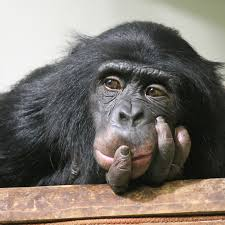

In [3]:
# Example 1: Standard case - clear animal image
image_path = os.path.join(TEST_IMAGES_DIR, 'chimpanzee_0.jpeg')

predicted_animal, confidence = classify_image(image_path, CLASSIFIER_MODEL_PATH)

print(f"Image: {image_path}")
print(f"Predicted animal: {predicted_animal}")
print(f"Confidence: {confidence:.2%}")

# Display the image
display(Image(filename=image_path, width=300))

### Edge Case 1: Low Quality Image
Testing with a blurry or low-resolution image.

Image: classifier/eval_dataset/blurry_coyote.jpeg
Predicted animal: coyote
Confidence: 63.23%

Note: Lower confidence expected for low-quality images


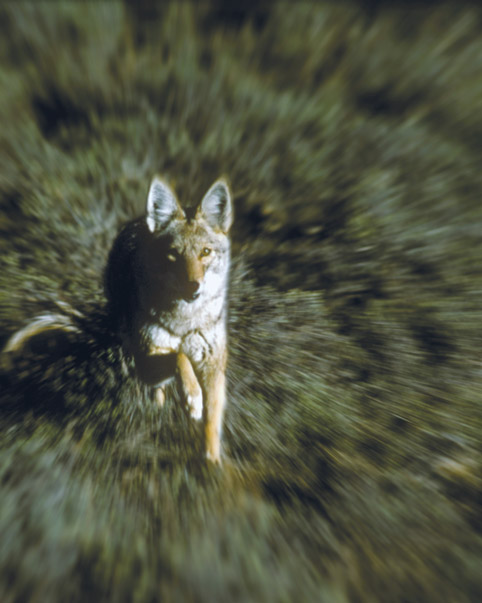

In [4]:
# Example 2: Edge case - low quality/blurry image
image_path = os.path.join(TEST_IMAGES_DIR, 'blurry_coyote.jpeg')

predicted_animal, confidence = classify_image(image_path, CLASSIFIER_MODEL_PATH)

print(f"Image: {image_path}")
print(f"Predicted animal: {predicted_animal}")
print(f"Confidence: {confidence:.2%}")
print(f"\nNote: Lower confidence expected for low-quality images")

display(Image(filename=image_path, width=300))

### Edge Case 2: Partial Animal Visibility
Testing when only part of the animal is visible.

Image: classifier/eval_dataset/partial_animal.jpeg
Predicted animal: hippopotamus
Confidence: 100.00%

Note: Partial visibility may affect accuracy


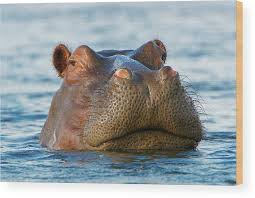

In [7]:
# Example 3: Edge case - partially visible animal
image_path = os.path.join(TEST_IMAGES_DIR, 'partial_animal.jpeg')

predicted_animal, confidence = classify_image(image_path, CLASSIFIER_MODEL_PATH)

print(f"Image: {image_path}")
print(f"Predicted animal: {predicted_animal}")
print(f"Confidence: {confidence:.2%}")
print(f"\nNote: Partial visibility may affect accuracy")

display(Image(filename=image_path, width=300))

### Edge Case 3: Non-existent Image
Testing error handling when image file doesn't exist.

In [28]:
# Example 4: Edge case - non-existent image
image_path = 'non_existent_image.jpeg'

try:
    predicted_animal, confidence = classify_image(image_path, CLASSIFIER_MODEL_PATH)
except FileNotFoundError as e:
    print(f"Error properly handled: {e}")

Error properly handled: Image not found: non_existent_image.jpeg


---

## Part 2: Named Entity Recognition (NER) Demo

### Standard Case
Extracting animal names from a simple sentence.

In [9]:
# Example 1: Standard case - single animal mention
text = "I saw a chimpanzee in the zoo yesterday."

extracted_animals = extract_animals(text, NER_MODEL_PATH)

print(f"Text: {text}")
print(f"Extracted animals: {extracted_animals}")

Text: I saw a chimpanzee in the zoo yesterday.
Extracted animals: ['chimpanzee']


### Standard Case: Multiple Animals
Testing with multiple animal mentions in one sentence.

In [3]:
# Example 2: Multiple animals in text
text = "The coyote and the chimpanzee were playing together."

extracted_animals = extract_animals(text, NER_MODEL_PATH)

print(f"Text: {text}")
print(f"Extracted animals: {extracted_animals}")

Text: The coyote and the chimpanzee were playing together.
Extracted animals: ['coyote', 'chimpanzee']


### Edge Case 1: No Animals Mentioned
Testing when no animals are present in the text.

In [4]:
# Example 3: Edge case - no animals in text
text = "I went to the store to buy some groceries."

extracted_animals = extract_animals(text, NER_MODEL_PATH)

print(f"Text: {text}")
print(f"Extracted animals: {extracted_animals if extracted_animals else 'None'}")

Text: I went to the store to buy some groceries.
Extracted animals: None


### Edge Case 2: Case Sensitivity
Testing if the model handles different capitalizations.

In [5]:
# Example 4: Edge case - different capitalizations
texts = [
    "There is a chimpanzee on this picture.",
    "There is a Chimpanzee on this picture.",
    "There is a CHIMPANZEE on this picture."
]

for text in texts:
    extracted_animals = extract_animals(text, NER_MODEL_PATH)
    print(f"Text: {text}")
    print(f"Extracted: {extracted_animals}")
    print()

Text: There is a chimpanzee on this picture.
Extracted: ['chimpanzee']

Text: There is a Chimpanzee on this picture.
Extracted: ['chimpanzee']

Text: There is a CHIMPANZEE on this picture.
Extracted: ['chimpanzee']



### Edge Case 3: Complex Sentence Structure
Testing with long, complex sentences.

In [6]:
# Example 5: Edge case - complex sentence
text = "While walking through the forest, I encountered a coyote, which reminded me of the documentary about chimpanzees I watched last night."

extracted_animals = extract_animals(text, NER_MODEL_PATH)

print(f"Text: {text}")
print(f"Extracted animals: {extracted_animals}")

Text: While walking through the forest, I encountered a coyote, which reminded me of the documentary about chimpanzees I watched last night.
Extracted animals: ['coyote', 'chimpanzees']


### Edge Case 4: Empty String
Testing with empty input.

In [8]:
# Example 6: Edge case - empty string
text = ""

try:
    extracted_animals = extract_animals(text, NER_MODEL_PATH)
except ValueError as e:
    print(f"Error properly handled: {e}")

Error properly handled: Input text must be a non-empty string.


---

## Part 3: Full Pipeline Demo

### Case 1: TRUE Statement
When the image matches the text.

Text: I saw a chimpanzee at the zoo today.
Extracted animals from text: ['chimpanzee']

Image classification: chimpanzee (confidence: 100.00%)


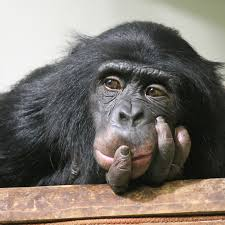


RESULT: The statement is TRUE!


In [11]:
# Example 1: TRUE case - image matches text
image_path = os.path.join(TEST_IMAGES_DIR, 'chimpanzee_0.jpeg')
text = "I saw a chimpanzee at the zoo today."

# Run both models
predicted_animal, confidence = classify_image(image_path, CLASSIFIER_MODEL_PATH)
extracted_animals = extract_animals(text, NER_MODEL_PATH)

# Display results
print(f"Text: {text}")
print(f"Extracted animals from text: {extracted_animals}")
print(f"\nImage classification: {predicted_animal} (confidence: {confidence:.2%})")

display(Image(filename=image_path, width=300))

# Verification
predicted_animal_lower = predicted_animal.lower()
extracted_animals_lower = [a.lower() for a in extracted_animals]

if extracted_animals_lower and predicted_animal_lower in extracted_animals_lower:
    print("\nRESULT: The statement is TRUE!")
else:
    print("\nRESULT: The statement is FALSE!")

### Case 2: FALSE Statement
When the image doesn't match the text.

Text: I saw a chimpanzee at the zoo today.
Extracted animals from text: ['chimpanzee']

Image classification: coyote (confidence: 99.99%)


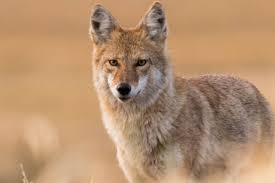


RESULT: The statement is FALSE!


In [12]:
# Example 2: FALSE case - image doesn't match text
image_path = os.path.join(TEST_IMAGES_DIR, 'coyote_1.jpeg')
text = "I saw a chimpanzee at the zoo today."

# Run both models
predicted_animal, confidence = classify_image(image_path, CLASSIFIER_MODEL_PATH)
extracted_animals = extract_animals(text, NER_MODEL_PATH)

# Display results
print(f"Text: {text}")
print(f"Extracted animals from text: {extracted_animals}")
print(f"\nImage classification: {predicted_animal} (confidence: {confidence:.2%})")

display(Image(filename=image_path, width=300))

# Verification
predicted_animal_lower = predicted_animal.lower()
extracted_animals_lower = [a.lower() for a in extracted_animals]

if extracted_animals_lower and predicted_animal_lower in extracted_animals_lower:
    print("\nRESULT: The statement is TRUE!")
else:
    print("\nRESULT: The statement is FALSE!")

### Edge Case 1: No Animals in Text
When the text doesn't mention any animals.

Text: I went to the park yesterday.
Extracted animals from text: None

Image classification: eagle (confidence: 100.00%)


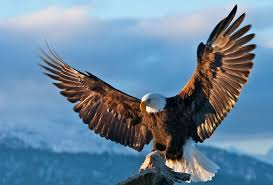


RESULT: The statement is FALSE!
Reason: No animals mentioned in text


In [13]:
# Example 3: Edge case - no animals mentioned in text
image_path = os.path.join(TEST_IMAGES_DIR, 'eagle_1.jpeg')
text = "I went to the park yesterday."

# Run both models
predicted_animal, confidence = classify_image(image_path, CLASSIFIER_MODEL_PATH)
extracted_animals = extract_animals(text, NER_MODEL_PATH)

# Display results
print(f"Text: {text}")
print(f"Extracted animals from text: {extracted_animals if extracted_animals else 'None'}")
print(f"\nImage classification: {predicted_animal} (confidence: {confidence:.2%})")

display(Image(filename=image_path, width=300))

# Verification
predicted_animal_lower = predicted_animal.lower()
extracted_animals_lower = [a.lower() for a in extracted_animals]

if extracted_animals_lower and predicted_animal_lower in extracted_animals_lower:
    print("\nRESULT: The statement is TRUE!")
else:
    print("\nRESULT: The statement is FALSE!")
    print("Reason: No animals mentioned in text")

### Edge Case 2: Multiple Animals in Text
When the text mentions multiple animals, including the one in the image.

Text: At the farm a duck and a hedgehog shared the same hedgerow after the rain.
Extracted animals from text: ['duck', 'hedgehog']

Image classification: duck (confidence: 100.00%)


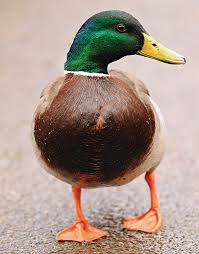


RESULT: The statement is TRUE!
Match found: 'duck' is in the list of mentioned animals


In [18]:
# Example 4: Edge case - multiple animals in text, one matches
image_path = os.path.join(TEST_IMAGES_DIR, 'duck_0.jpeg')
text = "At the farm a duck and a hedgehog shared the same hedgerow after the rain."

# Run both models
predicted_animal, confidence = classify_image(image_path, CLASSIFIER_MODEL_PATH)
extracted_animals = extract_animals(text, NER_MODEL_PATH)

# Display results
print(f"Text: {text}")
print(f"Extracted animals from text: {extracted_animals}")
print(f"\nImage classification: {predicted_animal} (confidence: {confidence:.2%})")

display(Image(filename=image_path, width=300))

# Verification
predicted_animal_lower = predicted_animal.lower()
extracted_animals_lower = [a.lower() for a in extracted_animals]

if extracted_animals_lower and predicted_animal_lower in extracted_animals_lower:
    print("\nRESULT: The statement is TRUE!")
    print(f"Match found: '{predicted_animal}' is in the list of mentioned animals")
else:
    print("\nRESULT: The statement is FALSE!")

### Edge Case 3: Low Confidence Classification
Testing behavior when the classifier has low confidence.

Text: I think I saw some kind of wild animal.
Extracted animals from text: None

Image classification: hedgehog (confidence: 60.68%)


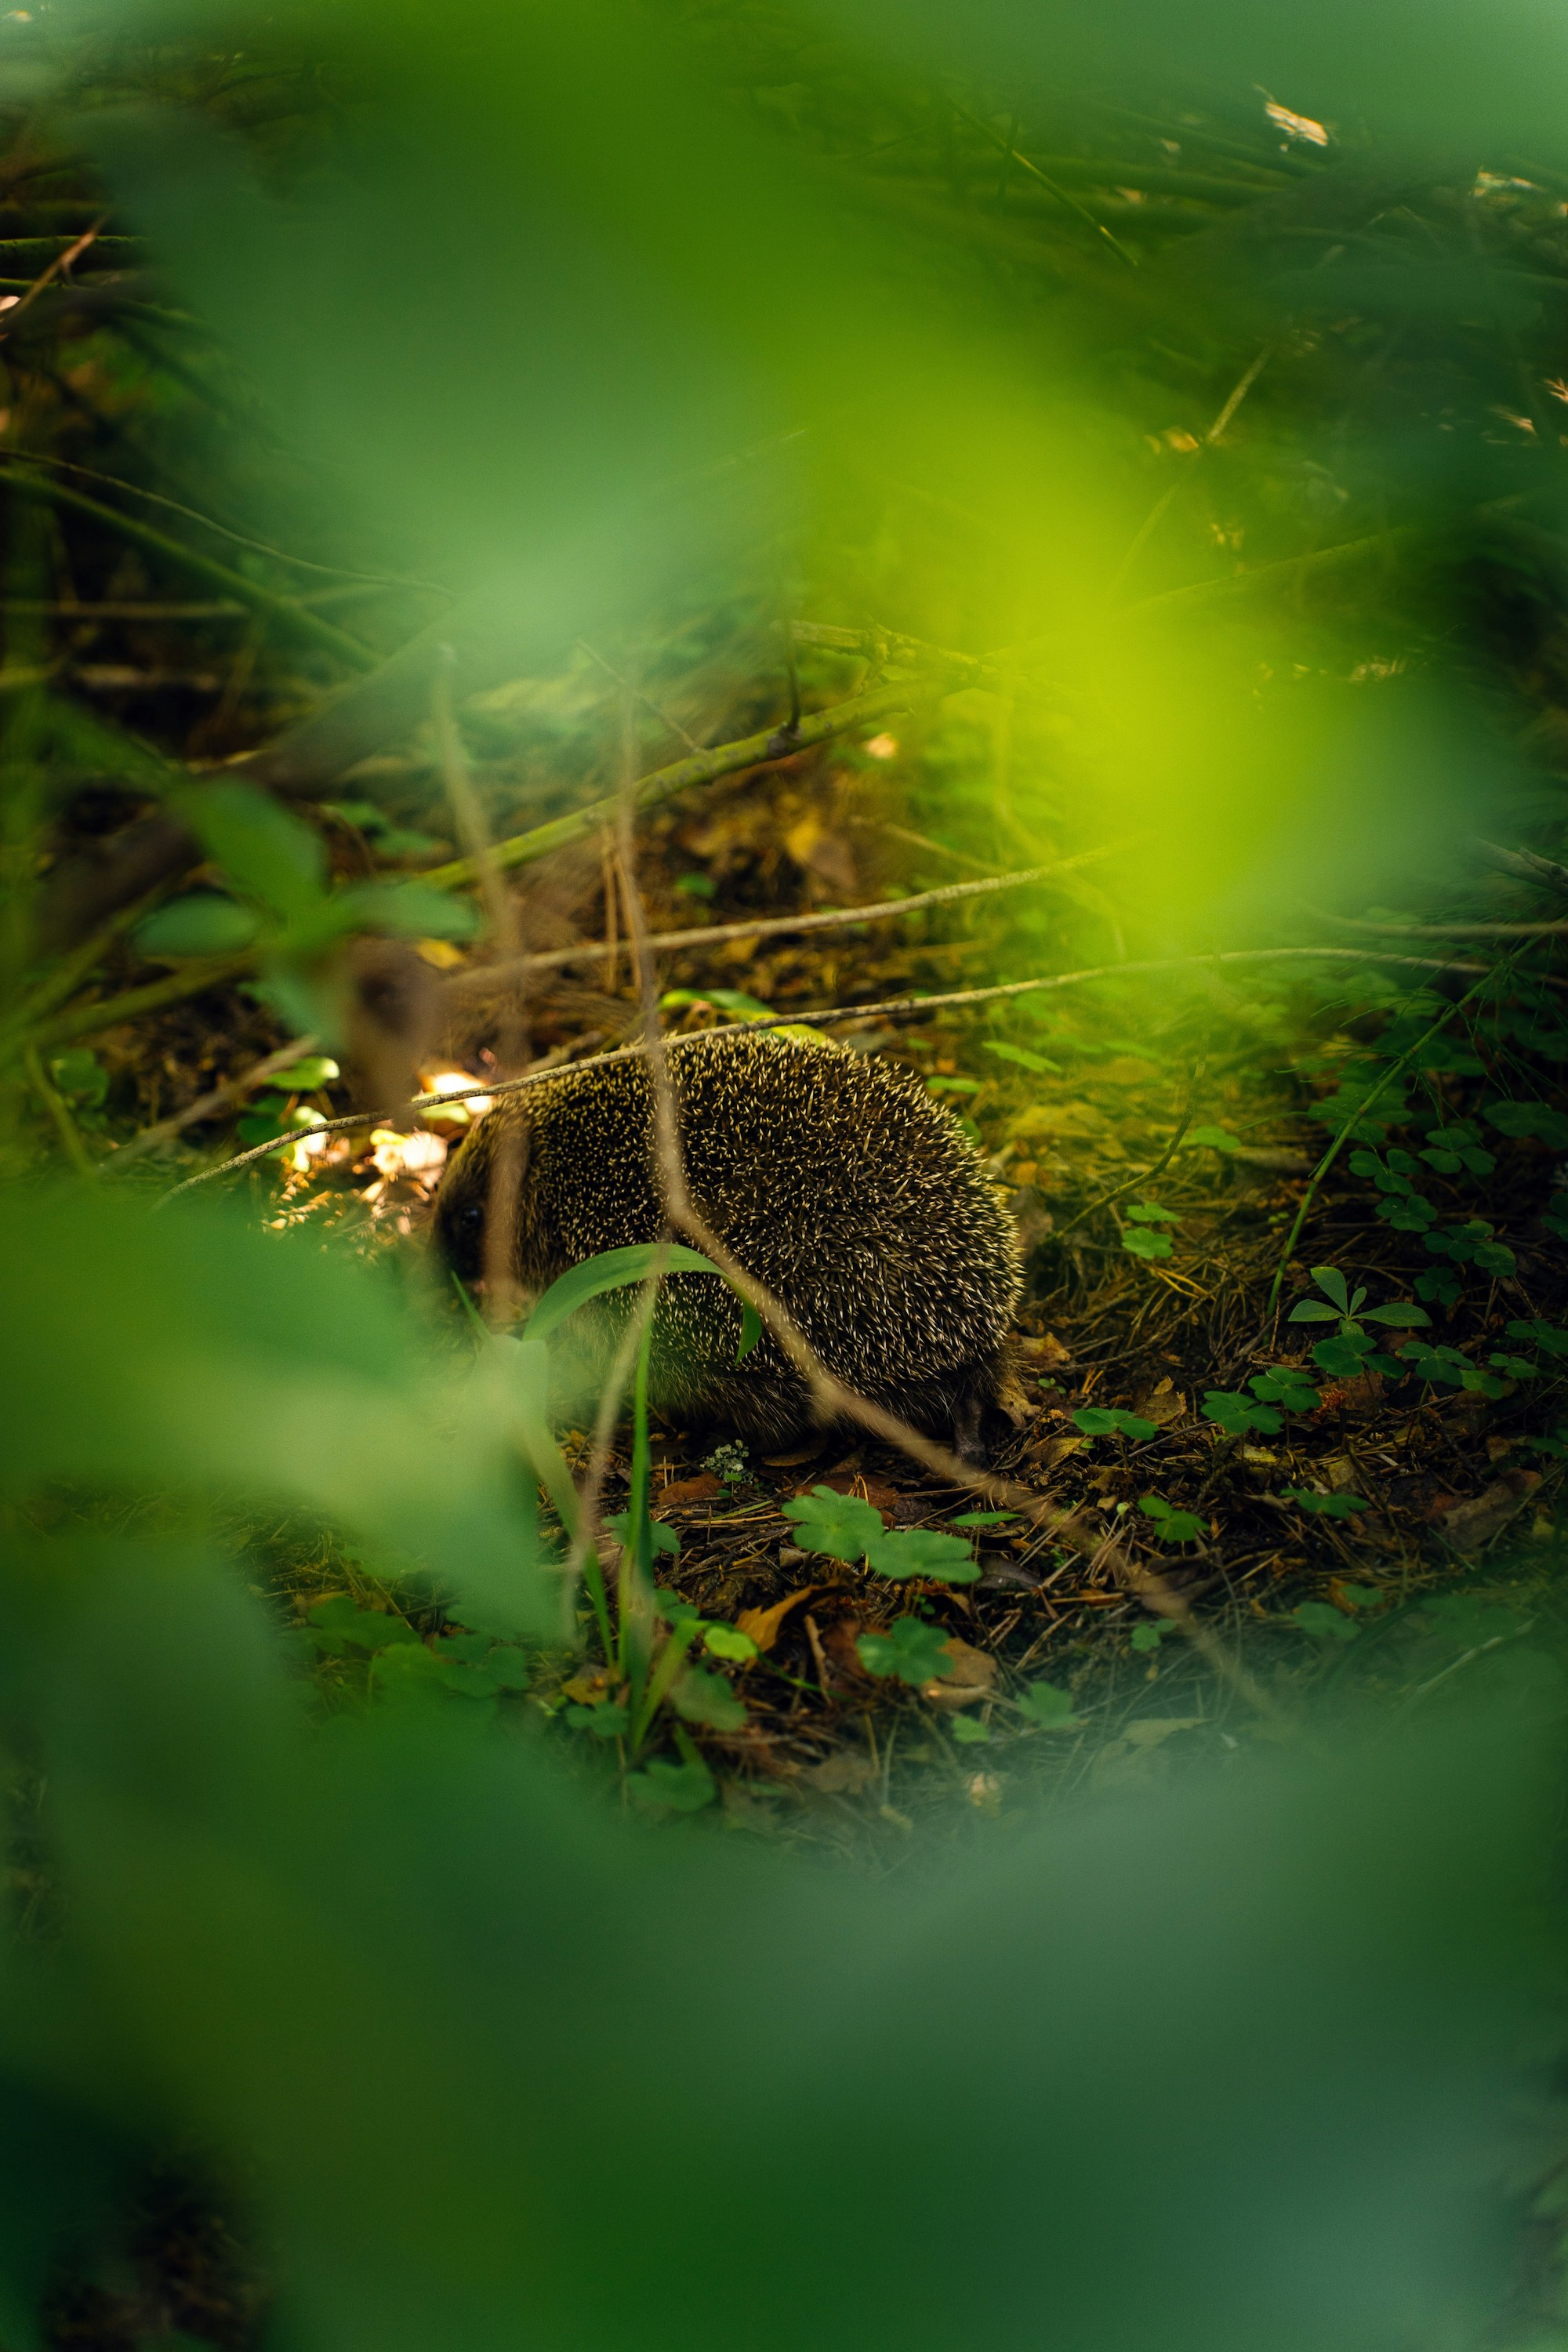


RESULT: The statement is FALSE!


In [17]:
# Example 5: Edge case - low confidence image classification
image_path = os.path.join(TEST_IMAGES_DIR, 'ambiguous_animal.jpeg')
text = "I think I saw some kind of wild animal."

# Run both models
predicted_animal, confidence = classify_image(image_path, CLASSIFIER_MODEL_PATH)
extracted_animals = extract_animals(text, NER_MODEL_PATH)

# Display results
print(f"Text: {text}")
print(f"Extracted animals from text: {extracted_animals if extracted_animals else 'None'}")
print(f"\nImage classification: {predicted_animal} (confidence: {confidence:.2%})")

if confidence < 0.5:
    print("Warning: Low confidence classification")

display(Image(filename=image_path, width=300))

# Verification
predicted_animal_lower = predicted_animal.lower()
extracted_animals_lower = [a.lower() for a in extracted_animals]

if extracted_animals_lower and predicted_animal_lower in extracted_animals_lower:
    print("\nRESULT: The statement is TRUE!")
else:
    print("\nRESULT: The statement is FALSE!")

---

## Summary

In this demo, we successfully tested the full animal recognition pipeline, which combines image classification and named entity recognition. The system correctly identifies animals in both images and text, handles ambiguous or empty inputs, and provides reliable verification results even in edge cases. Overall, the model demonstrates stable performance and robustness across different scenarios.